In [2]:
# 导入必要的库
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [3]:
# 初始化Spark会话
spark = SparkSession.builder.appName("World Happiness Analysis").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/21 13:48:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# 2. Data Understanding

## 2.1. Collecting Initial Data

world_happiness_report = spark.read.csv('./World Happiness Report 2020.csv', header=True, inferSchema=True)

world_data_by_country_fertility = spark.read.csv('./World Data by Country 2020/Fertility.csv', header=True, inferSchema=True)
world_data_by_country_gdp_per_capita = spark.read.csv('./World Data by Country 2020/GDP per capita.csv', header=True, inferSchema=True)
world_data_by_country_life_expectancy = spark.read.csv('./World Data by Country 2020/Life expectancy.csv', header=True, inferSchema=True)
world_data_by_country_meat_consumption = spark.read.csv('./World Data by Country 2020/Meat consumption.csv', header=True, inferSchema=True)
world_data_by_country_median_age = spark.read.csv('./World Data by Country 2020/Median age.csv', header=True, inferSchema=True)
world_data_by_country_population_growth = spark.read.csv('./World Data by Country 2020/Population growth.csv', header=True, inferSchema=True)
world_data_by_country_sex_ratio = spark.read.csv('./World Data by Country 2020/Sex-ratio.csv', header=True, inferSchema=True)
world_data_by_country_suicide_rate = spark.read.csv('./World Data by Country 2020/Suicide rate.csv', header=True, inferSchema=True)
world_data_by_country_urbanization_rate = spark.read.csv('./World Data by Country 2020/Urbanization rate.csv', header=True, inferSchema=True)

In [5]:
## 2.2. Describing Data

#%% Figure 2.2-1: Screenshot of Data and Data Type of the Dataset named “World Happiness Report 2020”
world_happiness_report.show(1)

+------------+------------------+------------+------------------------------+------------+------------+---------------------+--------------+-----------------------+----------------------------+------------+-------------------------+------------------------+--------------------------------+----------------------------+-------------------------------------+------------------------------------------+------------------------+---------------------------------------+-------------------+
|Country name|Regional indicator|Ladder score|Standard error of ladder score|upperwhisker|lowerwhisker|Logged GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|  Generosity|Perceptions of corruption|Ladder score in Dystopia|Explained by: Log GDP per capita|Explained by: Social support|Explained by: Healthy life expectancy|Explained by: Freedom to make life choices|Explained by: Generosity|Explained by: Perceptions of corruption|Dystopia + residual|
+------------+--------------

In [6]:
world_happiness_report.printSchema()

root
 |-- Country name: string (nullable = true)
 |-- Regional indicator: string (nullable = true)
 |-- Ladder score: double (nullable = true)
 |-- Standard error of ladder score: double (nullable = true)
 |-- upperwhisker: double (nullable = true)
 |-- lowerwhisker: double (nullable = true)
 |-- Logged GDP per capita: double (nullable = true)
 |-- Social support: double (nullable = true)
 |-- Healthy life expectancy: double (nullable = true)
 |-- Freedom to make life choices: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Perceptions of corruption: double (nullable = true)
 |-- Ladder score in Dystopia: double (nullable = true)
 |-- Explained by: Log GDP per capita: double (nullable = true)
 |-- Explained by: Social support: double (nullable = true)
 |-- Explained by: Healthy life expectancy: double (nullable = true)
 |-- Explained by: Freedom to make life choices: double (nullable = true)
 |-- Explained by: Generosity: double (nullable = true)
 |-- Explained 

In [7]:
#%% Figure 2.2-2: Screenshot of Data and Data Type of the Dataset named “World Data Country 2020” - Fertility rate
world_data_by_country_fertility.show(1)

+-----------+---------+--------+
|    Country|Fertility|ISO-code|
+-----------+---------+--------+
|Afghanistan|      4.5|     AFG|
+-----------+---------+--------+
only showing top 1 row



In [8]:
world_data_by_country_fertility.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Fertility: double (nullable = true)
 |-- ISO-code: string (nullable = true)



/tmp/ipykernel_1410/1024047404.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_happiness_report_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


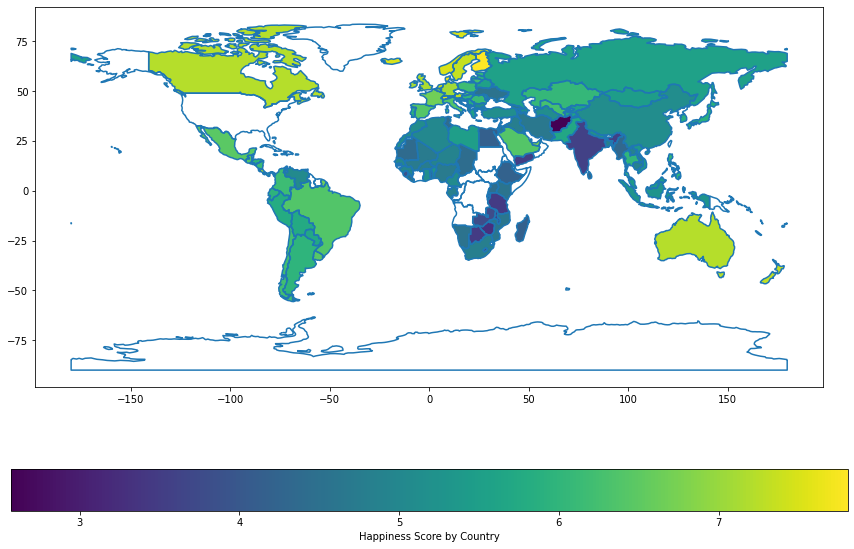

In [9]:
# 2.3. Data Exploration

#%% Figure 2.3-1: Screenshot of Global Happiness Map from the "World Happiness Report 2020"
world_happiness_report_pd = world_happiness_report.toPandas()
world_happiness_report_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_happiness_report_map = world_happiness_report_map.merge(world_happiness_report_pd, how='left', left_on='name', right_on='Country name')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_happiness_report_map.boundary.plot(ax=ax)
world_happiness_report_map.plot(column='Ladder score', ax=ax, legend=True,
                                legend_kwds={'label': "Happiness Score by Country", 'orientation': "horizontal"})
plt.show()

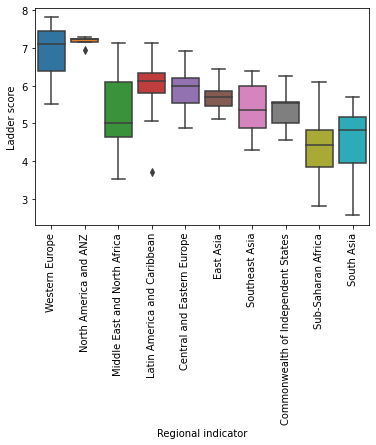

In [10]:
#%% Figure 2.3-2: Screenshot of Boxplots of Regional Happiness Scores from the "World Happiness Report 2020"
sns.boxplot(x='Regional indicator', y='Ladder score', data=world_happiness_report_pd)
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


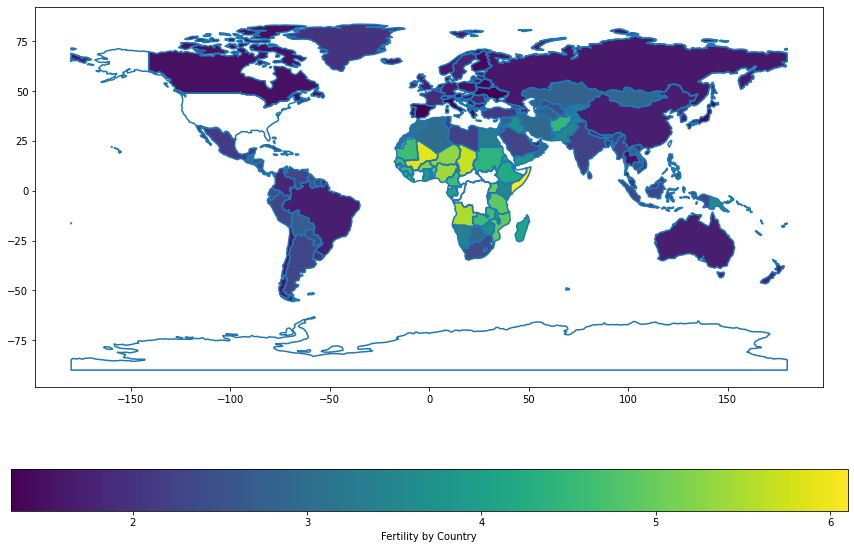

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


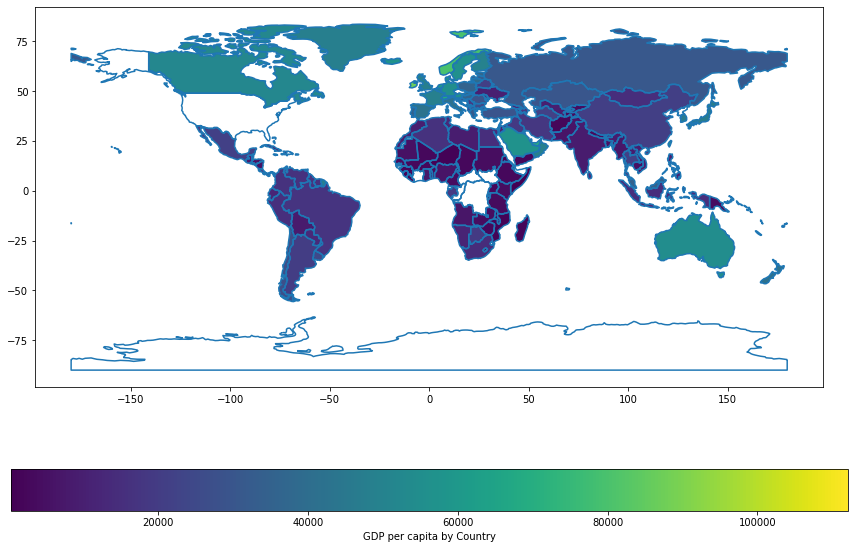

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


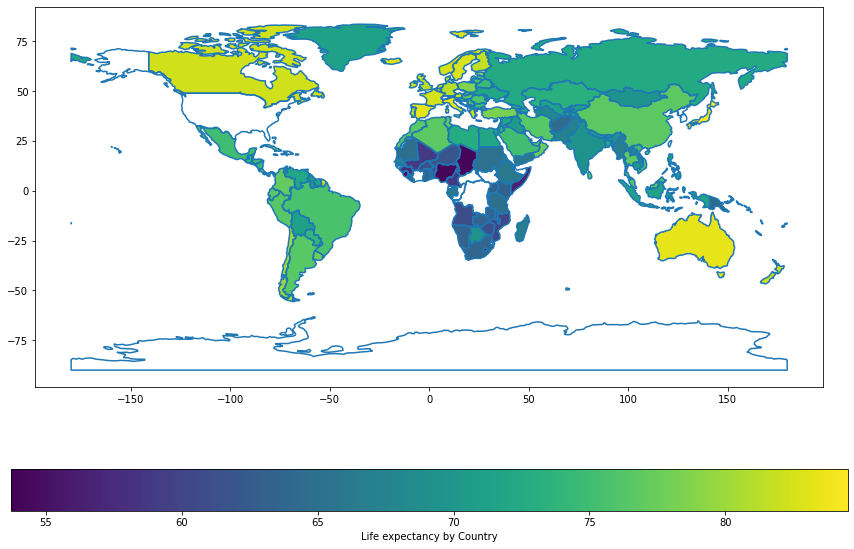

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


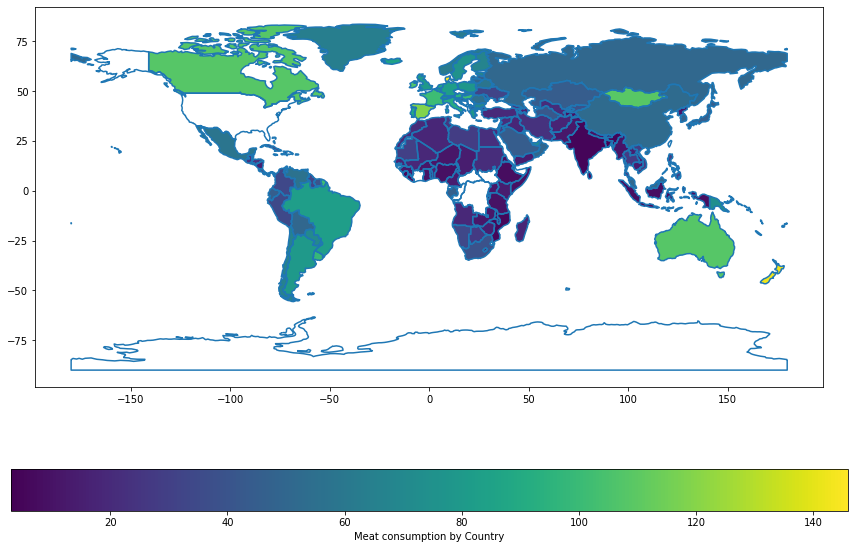

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


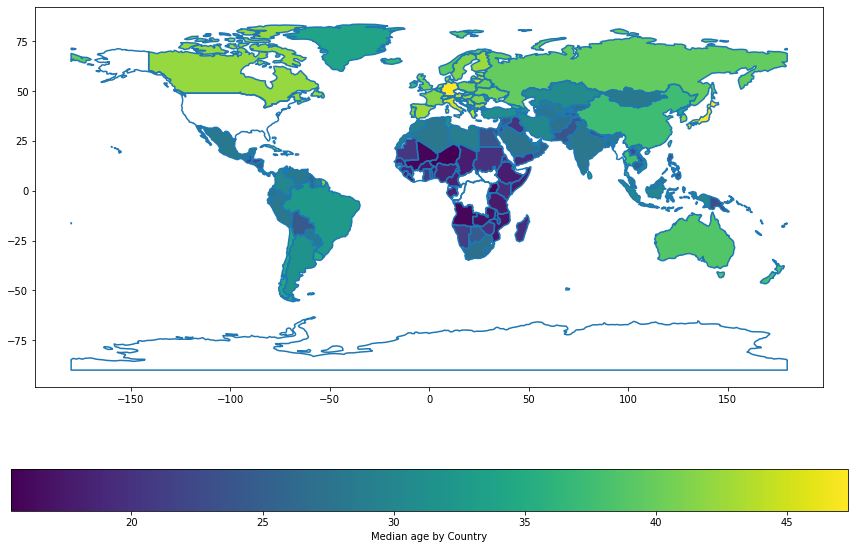

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


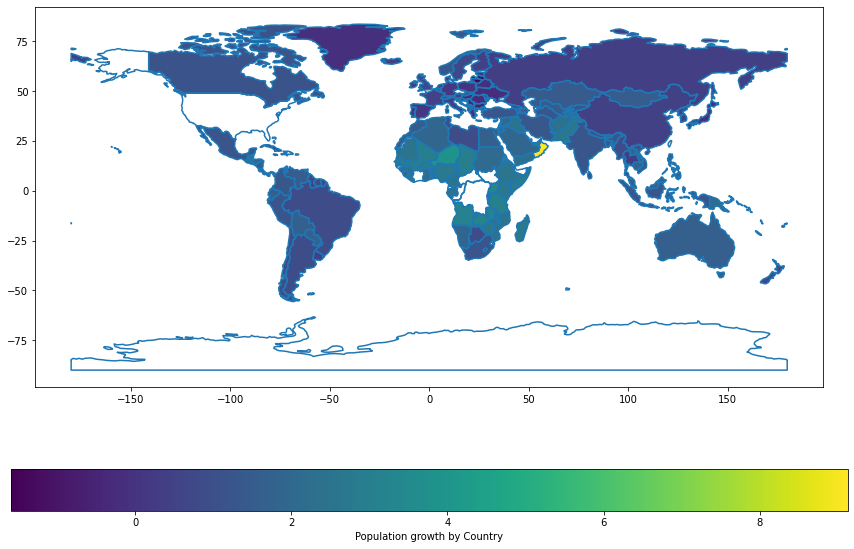

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


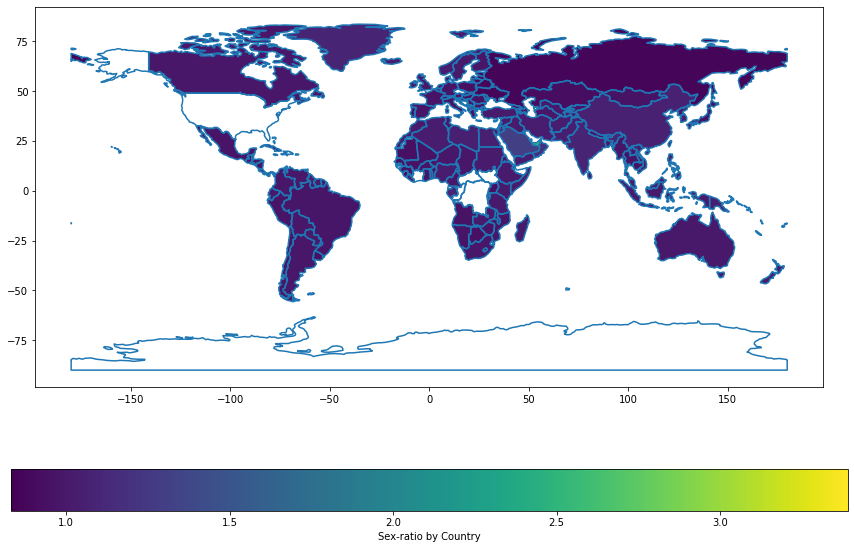

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


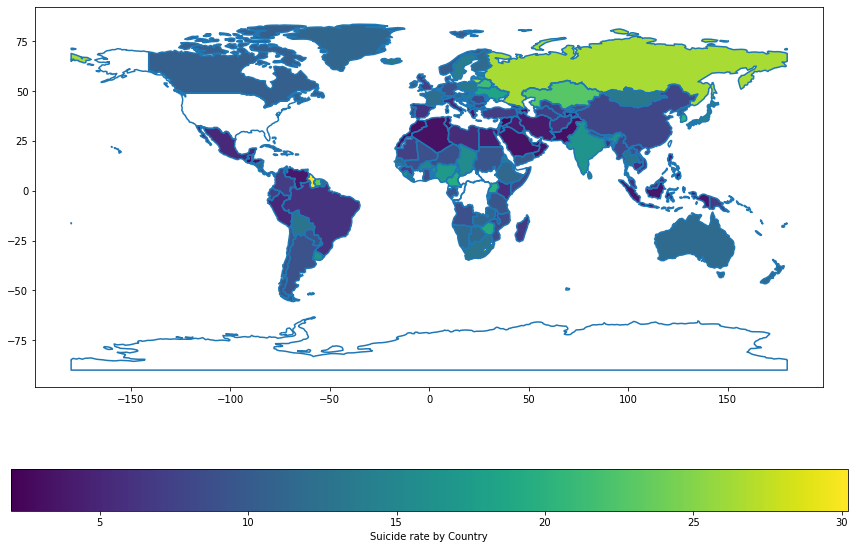

/tmp/ipykernel_1410/3914106468.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


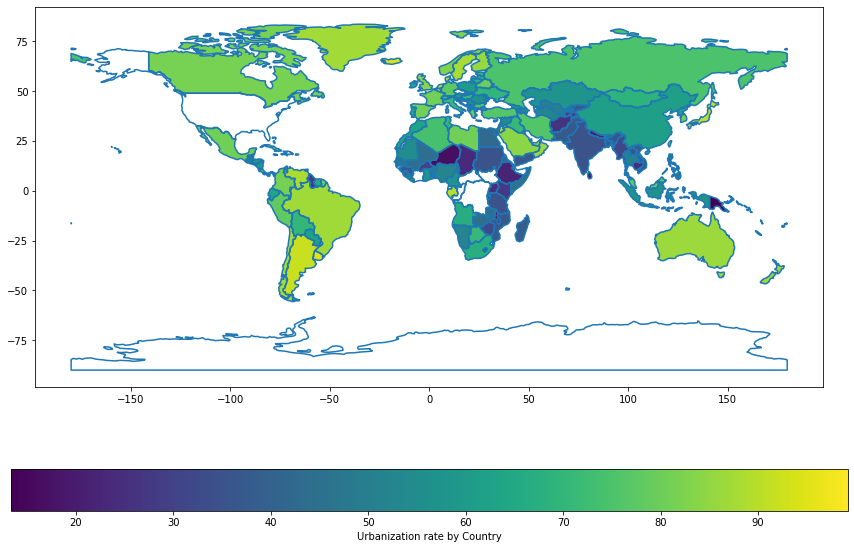

In [11]:
#%% Figure 2.3-3: Screenshot of Global Map of Fertility rate, GDP per Capita, Life expectancy, Meat consumption, Median age, Population growth, Sex-ratio, Suicide rate, Urbanization from the "World Data by Country 2020" (From left to right, from top to bottom)
def world_data_by_country_map(data, column, title):
    data_pd = data.toPandas()
    world_data_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world_data_map = world_data_map.merge(data_pd, how='left', left_on='name', right_on='Country')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world_data_map.boundary.plot(ax=ax)
    world_data_map.plot(column=column, ax=ax, legend=True,
                       legend_kwds={'label': f"{title} by Country", 'orientation': "horizontal"})
    plt.show()

world_data_by_country_map(world_data_by_country_fertility, 'Fertility', "Fertility")
world_data_by_country_map(world_data_by_country_gdp_per_capita, 'GDP per capita', "GDP per capita")
world_data_by_country_map(world_data_by_country_life_expectancy, 'Life expectancy', "Life expectancy")
world_data_by_country_map(world_data_by_country_meat_consumption, 'Meat consumption', "Meat consumption")
world_data_by_country_map(world_data_by_country_median_age, 'Median age', "Median age")
world_data_by_country_map(world_data_by_country_population_growth, 'Population growth', "Population growth")
world_data_by_country_map(world_data_by_country_sex_ratio, 'Sex-ratio', "Sex-ratio")
world_data_by_country_map(world_data_by_country_suicide_rate, 'Suicide rate', "Suicide rate")
world_data_by_country_map(world_data_by_country_urbanization_rate, 'Urbanization rate', "Urbanization rate")

In [12]:
# 2.4. Verifying Data Quality

#%% Figure 2.4-1: Screenshot of Data Quality of the Dataset of “World Happiness Report 2020” - Missing Value Analysis
world_happiness_report.select([(col(c).isNull().cast("int")).alias(c) for c in world_happiness_report.columns]) \
                                       .agg(*[(_sum(c)).alias(c) for c in world_happiness_report.columns]).show()

+------------+------------------+------------+------------------------------+------------+------------+---------------------+--------------+-----------------------+----------------------------+----------+-------------------------+------------------------+--------------------------------+----------------------------+-------------------------------------+------------------------------------------+------------------------+---------------------------------------+-------------------+
|Country name|Regional indicator|Ladder score|Standard error of ladder score|upperwhisker|lowerwhisker|Logged GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Generosity|Perceptions of corruption|Ladder score in Dystopia|Explained by: Log GDP per capita|Explained by: Social support|Explained by: Healthy life expectancy|Explained by: Freedom to make life choices|Explained by: Generosity|Explained by: Perceptions of corruption|Dystopia + residual|
+------------+------------------

In [13]:
#%% Figure 2.4-2: Screenshot of Data Quality of the Dataset of “World Data by Country 2020” - Missing Value Analysis
world_data_by_country = world_data_by_country_fertility
world_data_list = [
    world_data_by_country_gdp_per_capita, 
    world_data_by_country_life_expectancy, 
    world_data_by_country_meat_consumption, 
    world_data_by_country_median_age, 
    world_data_by_country_population_growth, 
    world_data_by_country_sex_ratio, 
    world_data_by_country_suicide_rate, 
    world_data_by_country_urbanization_rate
]

for data in world_data_list:
    world_data_by_country = world_data_by_country.join(data, on=['Country', 'ISO-code'], how='outer')

world_data_by_country.select([(col(c).isNull().cast("int")).alias(c) for c in world_data_by_country.columns]) \
                                       .agg(*[(_sum(c)).alias(c) for c in world_data_by_country.columns]).show()

+-------+--------+---------+--------------+---------------+----------------+----------+-----------------+---------+------------+-----------------+
|Country|ISO-code|Fertility|GDP per capita|Life expectancy|Meat consumption|Median age|Population growth|Sex-ratio|Suicide rate|Urbanization rate|
+-------+--------+---------+--------------+---------------+----------------+----------+-----------------+---------+------------+-----------------+
|      0|       3|       32|            42|             48|              45|         9|               26|        7|          51|               15|
+-------+--------+---------+--------------+---------------+----------------+----------+-----------------+---------+------------+-----------------+



In [14]:
#%% Figure 2.4-3: Screenshot of Data Quality of the Dataset of “World Happiness Report 2020” - Error Checking
def find_outliers(df):
    numeric_columns = [column for column, dtype in df.dtypes if dtype in ('double', 'int')]
    outlier_counts = []
    
    for column in numeric_columns:
        Q1 = df.approxQuantile(column, [0.25], 0.01)[0]
        Q3 = df.approxQuantile(column, [0.75], 0.01)[0]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
        outlier_counts.append((column, outliers_count))
    
    outlier_df = spark.createDataFrame(outlier_counts, ["Column", "OutlierCount"])
    return outlier_df

find_outliers(world_happiness_report).show()

+--------------------+------------+
|              Column|OutlierCount|
+--------------------+------------+
|        Ladder score|           0|
|Standard error of...|           7|
|        upperwhisker|           0|
|        lowerwhisker|           0|
|Logged GDP per ca...|           0|
|      Social support|           3|
|Healthy life expe...|           0|
|Freedom to make l...|           3|
|          Generosity|           2|
|Perceptions of co...|          12|
|Ladder score in D...|           0|
|Explained by: Log...|           0|
|Explained by: Soc...|           3|
|Explained by: Hea...|           0|
|Explained by: Fre...|           3|
|Explained by: Gen...|           2|
|Explained by: Per...|          15|
| Dystopia + residual|           2|
+--------------------+------------+



In [15]:
#%% Figure 2.4-4: Screenshot of Data Quality of the Dataset of “World Data by Country 2020” - Error Checking
find_outliers(world_data_by_country).show()

+-----------------+------------+
|           Column|OutlierCount|
+-----------------+------------+
|        Fertility|         171|
|   GDP per capita|         170|
|  Life expectancy|         146|
| Meat consumption|         117|
|       Median age|         186|
|Population growth|         174|
|        Sex-ratio|          23|
|     Suicide rate|          37|
|Urbanization rate|         151|
+-----------------+------------+



In [16]:
#%% Figure 2.4-5: Screenshot of Data Aggregate of  the Dataset of “World Happiness Report 2020” - Data Quality Patterns
def uniqueness_check(df, column_name):
    return df.groupBy(column_name).count().orderBy(col("count").desc())

uniqueness_check(world_happiness_report, "Country name").show()

+------------+-----+
|Country name|count|
+------------+-----+
|        Chad|    1|
|    Paraguay|    1|
|      Russia|    1|
|       Yemen|    1|
|     Senegal|    1|
|      Sweden|    1|
|North Cyprus|    1|
| Philippines|    1|
|   Singapore|    1|
|    Malaysia|    1|
|      Turkey|    1|
|      Malawi|    1|
|        Iraq|    1|
|     Germany|    1|
|     Comoros|    1|
|    Cambodia|    1|
| Afghanistan|    1|
| Ivory Coast|    1|
|    Maldives|    1|
|      Jordan|    1|
+------------+-----+
only showing top 20 rows



In [18]:
#%% Figure 2.4-6: Screenshot of Data Quality of  the Dataset of “World Data by Country 2020” - Data Quality Patterns
uniqueness_check(world_data_by_country, "Country").show()

+--------------+-----+
|       Country|count|
+--------------+-----+
|        Guinea|  512|
|Virgin Islands|    2|
|        Russia|    2|
|          Chad|    1|
|      Anguilla|    1|
|      Paraguay|    1|
|       Senegal|    1|
|      Kiribati|    1|
|       Eritrea|    1|
|         Yemen|    1|
|         Tonga|    1|
|        Sweden|    1|
|        Turkey|    1|
|        Guyana|    1|
|        Jersey|    1|
|   Philippines|    1|
|      Djibouti|    1|
|      Malaysia|    1|
|     Singapore|    1|
|          Fiji|    1|
+--------------+-----+
only showing top 20 rows

